# Finding the Main Factors Affecting Teen Pregnancy
This project looks at various socio-economic and political data to find factors that strongly correlate with increases in teen pregnancy rate. I aggregated, cleaned, and analyzed data related to religion, education, politics, state GDP, population density, and public school funding.

### Key Questions Explored:
- Which of the studied variables significantly correlate with teen pregnancy rate?
- Which factor most strongly affects teen pregnancy rate?

### Techniques used:
- pandas for data cleaning
- matplotlib for data visualization
- scikitlearn for linear regression

### Key Findings:
- Religiosity in each state appears to have the strongest effect on teen pregnancy rate, followed by education level of residents and population density.

### Data Sources:
- Teen Pregnancy rates: https://www.hhs.gov/ash/oah/adolescent-development/reproductive-health-and-teen-pregnancy/teen-pregnancy-and-childbearing/trends/index.html
- Religiosity by state: http://www.pewforum.org/religious-landscape-study/state/california/#importance-of-religion-by-state
- GDP by state: https://en.wikipedia.org/wiki/List_of_U.S._states_by_GDP#cite_note-2
- Election results: https://en.wikipedia.org/wiki/United_States_presidential_election
- Population, Land area: http://www.ipl.org/div/stateknow/popchart.html
- Public education spending: http://www.governing.com/gov-data/education-data/state-education-spending-per-pupil-data.html

# Reading and understanding dataset

In [729]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('teen pregnancy rate v2.csv')

data=data[0:51]
data.iloc[0]

State                                  Alabama
Teen birth rate (15-19 year olds)           32
Rel-Very Important                         77%
Rel-Somewhat Important                     13%
Rel-Not too important                       6%
Rel-Not at all important                    4%
Rel-Sample Size                            511
Edu-High School                         84.30%
Edu-Bachelors                           23.50%
Edu-Advanced                             8.70%
Clinton vote %                          34.36%
Trump vote %                            62.08%
Gary Johnson vote %                      2.09%
Jill Stein vote %                        0.44%
Obama vote %-12                         38.36%
Romney vote %-12                        60.55%
Gary Johnson vote %-12                   0.59%
Jill Stein vote %-12                     0.16%
Obama vote % 08                         38.74%
McCain vote %                           60.32%
GDP (millions)                         204,861
Population   

# Cleaning dataset to remove special characters and converting to float

In [731]:
import re

def percent_convert(col):
    for row in data[col]:
        num_str = re.sub('[$%,]', '', str(row))
        #num_str = str(row).strip('%')
        
        num = float(num_str)
        data[col] = data[col].replace(row, num)

In [732]:
data_num = data.iloc[:,1:]
data_col = data_num.columns
for val in data_col:
    percent_convert(val)

In [733]:
data.head()

,State,Teen birth rate (15-19 year olds),Rel-Very Important,Rel-Somewhat Important,Rel-Not too important,Rel-Not at all important,Rel-Sample Size,Edu-High School,Edu-Bachelors,Edu-Advanced,...,Romney vote %-12,Gary Johnson vote %-12,Jill Stein vote %-12,Obama vote % 08,McCain vote %,GDP (millions),Population,Land Area (sq mi),2010 to 2014 change,2014 spent per student
0,Alabama,32.0,77.0,13.0,6.0,4.0,511.0,84.3,23.5,8.7,...,60.55,0.59,0.16,38.74,60.32,204861.0,4779736.0,50744.00,-6.4,9028.0
1,Alaska,27.8,41.0,29.0,13.0,16.0,310.0,92.1,28.0,10.1,...,54.80,2.46,0.97,37.89,59.42,50713.0,710231.0,571951.26,7.5,18416.0
2,Arizona,29.9,51.0,24.0,13.0,11.0,653.0,86.0,27.5,10.2,...,53.65,1.40,0.34,45.12,53.64,302952.0,6392017.0,113634.57,-11.6,7528.0
3,Arkansas,39.5,70.0,16.0,7.0,5.0,311.0,84.8,21.1,7.5,...,60.57,1.52,0.87,38.86,58.72,120689.0,2915918.0,52068.17,-3.1,9616.0
4,California,21.1,47.0,26.0,13.0,14.0,3697.0,81.8,31.4,11.6,...,37.12,1.10,0.66,61.01,36.95,2602672.0,37253956.0,155959.34,-5.7,9595.0


In [734]:
data.describe()

,Teen birth rate (15-19 year olds),Rel-Very Important,Rel-Somewhat Important,Rel-Not too important,Rel-Not at all important,Rel-Sample Size,Edu-High School,Edu-Bachelors,Edu-Advanced,Clinton vote %,...,Romney vote %-12,Gary Johnson vote %-12,Jill Stein vote %-12,Obama vote % 08,McCain vote %,GDP (millions),Population,Land Area (sq mi),2010 to 2014 change,2014 spent per student
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,5.100000e+01,5.100000e+01,51.000000,51.000000,51.000000
mean,24.496078,52.647059,24.352941,11.235294,11.078431,687.666667,87.782353,29.639216,11.243137,44.660392,...,48.999608,1.174118,0.361765,51.335490,47.047451,3.618879e+05,6.053834e+06,69361.538039,-3.580392,11518.000000
std,7.797588,10.648612,4.385538,3.922184,4.302758,646.733165,3.657087,6.028170,3.838919,12.031227,...,11.744209,0.618460,0.303965,11.081295,11.014501,4.599661e+05,6.823984e+06,85696.320894,5.039842,3324.765086
min,10.600000,32.000000,13.000000,4.000000,4.000000,301.000000,73.000000,19.200000,7.400000,19.730000,...,7.280000,0.000000,0.000000,32.540000,6.530000,3.109200e+04,5.636260e+05,61.400000,-14.200000,6500.000000
25%,19.200000,45.500000,22.500000,8.500000,8.000000,312.000000,85.550000,26.200000,9.100000,35.900000,...,41.135000,0.825000,0.085000,42.795000,40.440000,8.860700e+04,1.696962e+06,33364.225000,-6.850000,9115.000000
50%,23.200000,51.000000,25.000000,12.000000,11.000000,439.000000,88.400000,28.800000,10.400000,45.130000,...,47.690000,1.080000,0.330000,51.500000,46.910000,2.097160e+05,4.339367e+06,53926.820000,-4.500000,10749.000000
75%,28.500000,59.500000,27.000000,13.000000,14.000000,709.000000,90.550000,32.100000,12.150000,51.580000,...,57.835000,1.390000,0.570000,57.540000,55.945000,4.784890e+05,6.636084e+06,80712.480000,-0.850000,13507.500000
max,39.500000,77.000000,32.000000,23.000000,22.000000,3697.000000,92.800000,54.600000,31.300000,90.480000,...,72.790000,3.550000,1.140000,92.460000,65.650000,2.602672e+06,3.725396e+07,571951.260000,9.600000,20610.000000


# Plotting all factors vs. teen pregnancy rate to explore correlations

In [735]:
data_col_plot = data_col[1:]
data_col_plot

Index(['Rel-Very Important', 'Rel-Somewhat Important', 'Rel-Not too important',
       'Rel-Not at all important', 'Rel-Sample Size', 'Edu-High School',
       'Edu-Bachelors', 'Edu-Advanced', 'Clinton vote %', 'Trump vote %',
       'Gary Johnson vote %', 'Jill Stein vote %', 'Obama vote %-12',
       'Romney vote %-12', 'Gary Johnson vote %-12', 'Jill Stein vote %-12',
       'Obama vote % 08', 'McCain vote %', 'GDP (millions)', 'Population',
       'Land Area (sq mi)', '2010 to 2014 change', '2014 spent per student'],
      dtype='object')

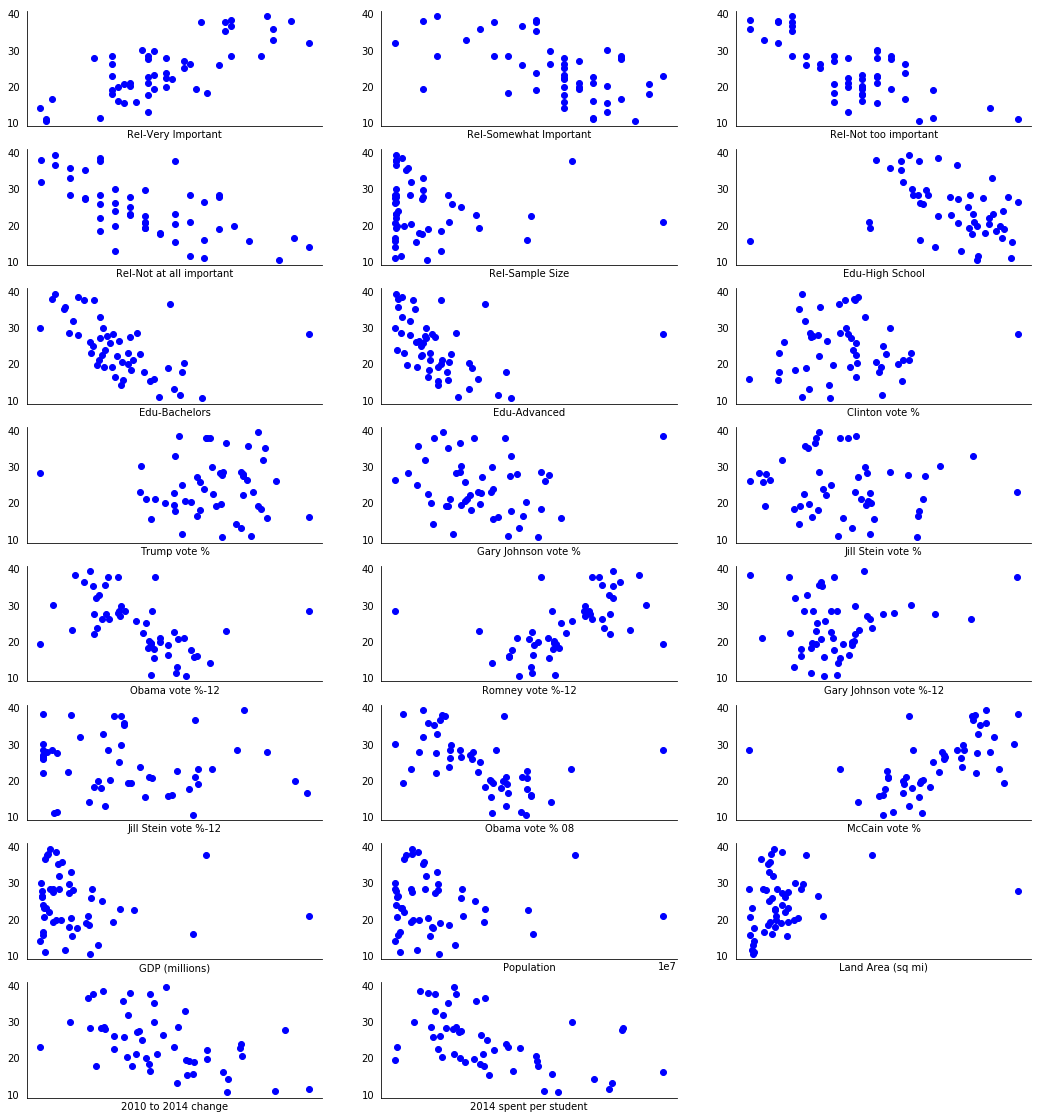

In [736]:
from scipy.stats.stats import pearsonr

fig = plt.figure(figsize=(18, 20))
corr_coeff_p_val = []

for i in range(0,len(data_col_plot)):
    ax = fig.add_subplot(8,3,i+1)
    ax.scatter(data[data_col_plot[i]], data['Teen birth rate (15-19 year olds)'], c='blue')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(data_col_plot[i])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    
plt.show()

# Creating new factors with data—GDP per capita and Population Density

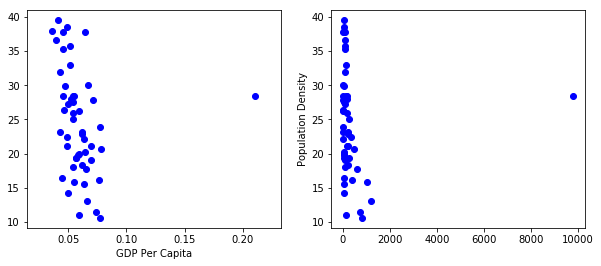

In [737]:
data['GDP Per Capita'] = data['GDP (millions)'] / data['Population']
data['Population Density'] = data['Population'] / data['Land Area (sq mi)']

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.scatter(data['GDP Per Capita'], data['Teen birth rate (15-19 year olds)'], c='blue')
ax1.set_xlabel('GDP Per Capita')
ax2.scatter(data['Population Density'], data['Teen birth rate (15-19 year olds)'], c='blue')
ax2.set_ylabel('Population Density')

plt.show()

# Removing Washington DC as an outlier

In [738]:
no_DC = data.drop([8])
no_DC = no_DC.reset_index(drop=True)
no_DC.head(10)

,State,Teen birth rate (15-19 year olds),Rel-Very Important,Rel-Somewhat Important,Rel-Not too important,Rel-Not at all important,Rel-Sample Size,Edu-High School,Edu-Bachelors,Edu-Advanced,...,Jill Stein vote %-12,Obama vote % 08,McCain vote %,GDP (millions),Population,Land Area (sq mi),2010 to 2014 change,2014 spent per student,GDP Per Capita,Population Density
0,Alabama,32.0,77.0,13.0,6.0,4.0,511.0,84.3,23.5,8.7,...,0.16,38.74,60.32,204861.0,4779736.0,50744.00,-6.4,9028.0,0.042860,94.193126
1,Alaska,27.8,41.0,29.0,13.0,16.0,310.0,92.1,28.0,10.1,...,0.97,37.89,59.42,50713.0,710231.0,571951.26,7.5,18416.0,0.071404,1.241768
2,Arizona,29.9,51.0,24.0,13.0,11.0,653.0,86.0,27.5,10.2,...,0.34,45.12,53.64,302952.0,6392017.0,113634.57,-11.6,7528.0,0.047395,56.250637
3,Arkansas,39.5,70.0,16.0,7.0,5.0,311.0,84.8,21.1,7.5,...,0.87,38.86,58.72,120689.0,2915918.0,52068.17,-3.1,9616.0,0.041390,56.001930
4,California,21.1,47.0,26.0,13.0,14.0,3697.0,81.8,31.4,11.6,...,0.66,61.01,36.95,2602672.0,37253956.0,155959.34,-5.7,9595.0,0.069863,238.869669
5,Colorado,20.3,47.0,28.0,12.0,13.0,504.0,90.7,38.1,14.0,...,0.29,53.66,44.71,323692.0,5029196.0,103717.53,-6.5,8985.0,0.064363,48.489354
6,Connecticut,11.5,42.0,27.0,17.0,14.0,377.0,89.9,37.6,16.6,...,0.06,60.59,38.22,263379.0,3574097.0,4844.80,9.6,17745.0,0.073691,737.718172
7,Delaware,20.7,46.0,31.0,10.0,11.0,301.0,88.4,30.0,12.2,...,0.47,61.94,36.95,70387.0,897934.0,1953.56,3.7,13938.0,0.078388,459.639837
8,Florida,22.5,53.0,25.0,11.0,11.0,2020.0,86.9,27.3,9.8,...,0.11,51.03,48.22,926817.0,18801310.0,53926.82,-7.7,8755.0,0.049295,348.644886
9,Georgia,28.4,64.0,20.0,7.0,8.0,968.0,85.4,28.8,10.7,...,0.04,46.99,52.20,525360.0,9687653.0,57906.14,-9.8,9202.0,0.054230,167.299236


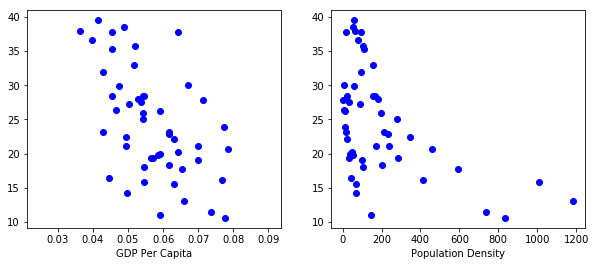

In [739]:
no_DC['GDP Per Capita'] = no_DC['GDP (millions)'] / no_DC['Population']
no_DC['Population Density'] = no_DC['Population']/ no_DC['Land Area (sq mi)']

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2
                     )
ax1.scatter(no_DC['GDP Per Capita'], no_DC['Teen birth rate (15-19 year olds)'], c='blue')
ax1.set_xlabel('GDP Per Capita')
ax2.scatter(no_DC['Population Density'], no_DC['Teen birth rate (15-19 year olds)'], c='blue')
ax2.set_xlabel('Population Density')

plt.show()

# Filtering out data columns with correlation p-values > 0.05

In [740]:
data_corr_coeff = no_DC.iloc[:,2:]
data_corr_coeff_columns = data_corr_coeff.columns

corr_coeff_p_val = [.0001, .0001]

for i in range(len(data_corr_coeff_columns)):
    corr = pearsonr(data_corr_coeff[data_corr_coeff_columns[i]], no_DC['Teen birth rate (15-19 year olds)'])
    corr_coeff_p_val.append(corr[1])

corr_coeff_p_val

[0.0001,
 0.0001,
 1.2407154733064282e-10,
 3.9629055718286087e-05,
 2.1737422455146325e-10,
 2.4176657328016741e-07,
 0.66388938136948772,
 0.027039739218849172,
 1.8072350846599617e-08,
 8.9525735350016956e-06,
 0.94610180637646912,
 0.74575687957930015,
 0.63330294792755226,
 0.42839360104924584,
 1.1615277060908256e-06,
 9.4724509652600652e-07,
 0.20923862064818041,
 0.26999620485617309,
 2.7895604876053226e-07,
 1.1274253124405869e-07,
 0.48551656491693906,
 0.78282174936694737,
 0.06558307502496126,
 0.0002301037499038746,
 4.5026561051208461e-05,
 3.3063164772610132e-05,
 0.00016807331290493002]

In [741]:
model_factors = [row < 0.05 for row in corr_coeff_p_val]
data_model = no_DC.loc[:,model_factors]
data_model.head(10)

,State,Teen birth rate (15-19 year olds),Rel-Very Important,Rel-Somewhat Important,Rel-Not too important,Rel-Not at all important,Edu-High School,Edu-Bachelors,Edu-Advanced,Obama vote %-12,Romney vote %-12,Obama vote % 08,McCain vote %,2010 to 2014 change,2014 spent per student,GDP Per Capita,Population Density
0,Alabama,32.0,77.0,13.0,6.0,4.0,84.3,23.5,8.7,38.36,60.55,38.74,60.32,-6.4,9028.0,0.042860,94.193126
1,Alaska,27.8,41.0,29.0,13.0,16.0,92.1,28.0,10.1,40.81,54.80,37.89,59.42,7.5,18416.0,0.071404,1.241768
2,Arizona,29.9,51.0,24.0,13.0,11.0,86.0,27.5,10.2,44.59,53.65,45.12,53.64,-11.6,7528.0,0.047395,56.250637
3,Arkansas,39.5,70.0,16.0,7.0,5.0,84.8,21.1,7.5,36.88,60.57,38.86,58.72,-3.1,9616.0,0.041390,56.001930
4,California,21.1,47.0,26.0,13.0,14.0,81.8,31.4,11.6,60.24,37.12,61.01,36.95,-5.7,9595.0,0.069863,238.869669
5,Colorado,20.3,47.0,28.0,12.0,13.0,90.7,38.1,14.0,51.49,46.13,53.66,44.71,-6.5,8985.0,0.064363,48.489354
6,Connecticut,11.5,42.0,27.0,17.0,14.0,89.9,37.6,16.6,58.06,40.73,60.59,38.22,9.6,17745.0,0.073691,737.718172
7,Delaware,20.7,46.0,31.0,10.0,11.0,88.4,30.0,12.2,58.61,39.98,61.94,36.95,3.7,13938.0,0.078388,459.639837
8,Florida,22.5,53.0,25.0,11.0,11.0,86.9,27.3,9.8,50.01,49.13,51.03,48.22,-7.7,8755.0,0.049295,348.644886
9,Georgia,28.4,64.0,20.0,7.0,8.0,85.4,28.8,10.7,45.48,53.30,46.99,52.20,-9.8,9202.0,0.054230,167.299236


# Running linear regression on significant factors

In [742]:
from sklearn.linear_model import LinearRegression

Y = data_model.iloc[:,1]
X = data_model.iloc[:,2:]
X_norm = (X / X.max())

mdl = LinearRegression().fit(X_norm,Y) 
m = mdl.coef_
b = mdl.intercept_
r_squared = mdl.score(X_norm, Y)
r_squared

0.85927022985514478

# Visualizing regression coefficients

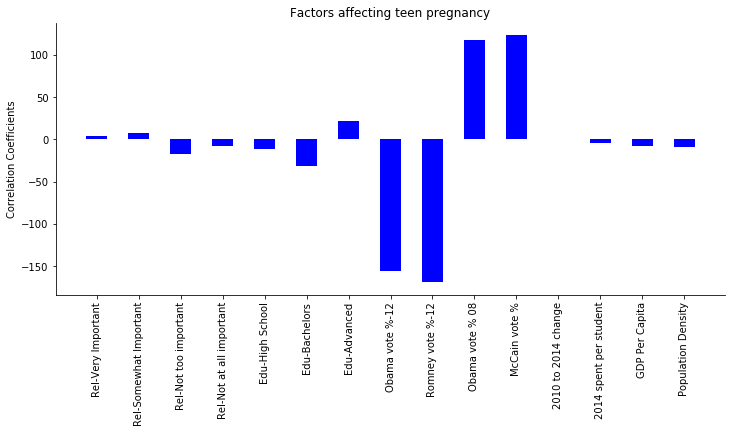

In [743]:
bar_position = range(8)

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1,1,1)

ax.bar(range(len(m)), m, 0.5,  color='blue',)

ax.set_xticks(range(len(m)))
ax.set_xticklabels(X.columns, rotation = 90)


plt.ylabel('Correlation Coefficients')
plt.title('Factors affecting teen pregnancy')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# Reducing model complexity and aggregating related factors

In [744]:
religion_ratio = (data_model['Rel-Very Important']) + (data_model['Rel-Somewhat Important'])/(data_model['Rel-Not too important'] + data_model['Rel-Not at all important'])
political_ratio = (data_model['Obama vote %-12'] + data_model['Obama vote % 08']) / (data_model['Romney vote %-12'] + data_model['McCain vote %'])
education_score = 1*data_model['Edu-High School'] + 2*data_model['Edu-Bachelors'] + 3*data_model['Edu-Advanced']

print(pearsonr(religion_ratio, no_DC['Teen birth rate (15-19 year olds)']))
print(pearsonr(political_ratio, no_DC['Teen birth rate (15-19 year olds)']))
print(pearsonr(education_score, no_DC['Teen birth rate (15-19 year olds)']))

(0.7667384783619603, 8.489500783097854e-11)
(-0.61239925505011439, 2.2862678584385383e-06)
(-0.67132897857641682, 9.5028155073303186e-08)


In [745]:
data_model_red = data_model.drop(['Rel-Very Important', 'Rel-Somewhat Important',
                                  'Rel-Not too important', 'Rel-Not at all important'],1)
data_model_reduce = data_model_red.drop(['Obama vote %-12', 'Obama vote % 08',
                                  'Romney vote %-12', 'McCain vote %'],1)
data_model_reduced = data_model_reduce.drop(['Edu-High School','Edu-Bachelors', 'Edu-Advanced','2010 to 2014 change'],1)

data_model_reduced['religion ratio'] = religion_ratio
data_model_reduced['political ratio'] = political_ratio
data_model_reduced['education score'] = education_score
data_model_reduced.head()

,State,Teen birth rate (15-19 year olds),2014 spent per student,GDP Per Capita,Population Density,religion ratio,political ratio,education score
0,Alabama,32.0,9028.0,0.042860,94.193126,78.300000,0.637875,157.4
1,Alaska,27.8,18416.0,0.071404,1.241768,42.000000,0.689021,178.4
2,Arizona,29.9,7528.0,0.047395,56.250637,52.000000,0.836145,171.6
3,Arkansas,39.5,9616.0,0.041390,56.001930,71.333333,0.634923,149.5
4,California,21.1,9595.0,0.069863,238.869669,47.962963,1.636965,179.4


# Linear regression on new, reduced model

In [746]:
import statsmodels.formula.api as sm

Y_red = data_model_reduced.iloc[:,1]
X_red = data_model_reduced.iloc[:,2:]
X_red_norm = (X_red)/X_red.max()

mdl2 = LinearRegression().fit(X_red_norm,Y_red) # either this or the next line
m2 = mdl2.coef_
b2 = mdl2.intercept_
r_squared = mdl2.score(X_red_norm,Y_red)
print(b2)
print(Y.max())
r_squared

21.8185333836
39.5


0.74427221363782203

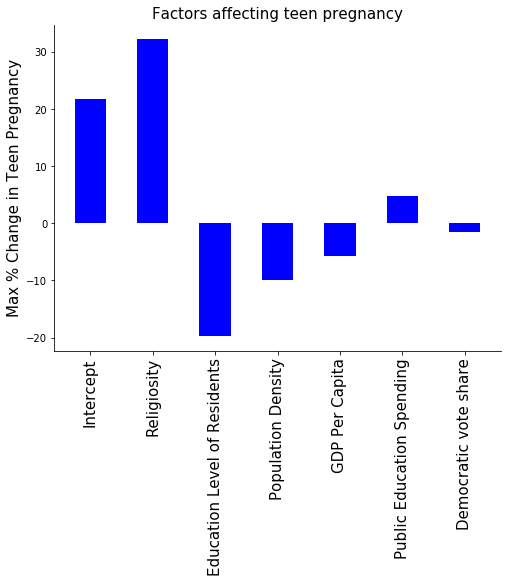

In [747]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

plot_m = [21.8, 32.16, -19.71, -9.91, -5.74, 4.73, -1.504]
m_labels = ['Intercept','Religiosity', 'Education Level of Residents', 'Population Density', 'GDP Per Capita', 'Public Education Spending', 'Democratic vote share']

ax.bar(range(len(plot_m)), plot_m, 0.5,  color='blue',)

ax.set_xticks(range(len(plot_m)))
ax.set_xticklabels(m_labels, rotation = 90, fontsize=15)


plt.ylabel('Max % Change in Teen Pregnancy', fontsize=15)
plt.title('Factors affecting teen pregnancy', fontsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

# Model Findings in order of importance
- Religion: teen pregnancy rate goes UP as religiosity goes UP in the state
- Education Level of Residents in State: teen pregnancy rate goes DOWN as education level goes UP
- Population Density: teen pregnancy rate goes DOWN as population density goes UP
- GDP Per Capita: teen pregnancy rate goes UP as public education spending goes UP
- Politics: teen pregnancy rate goes UP for states that lean Republican

# Next steps
- Analysis of variance (ANOVA) on model factors
- Finding whether factors are linearly independent
- Refining aggregated scores of important factors
- Adding in additional socio-economic variables

(-0.60267312404469875, 3.6365021147502947e-06)

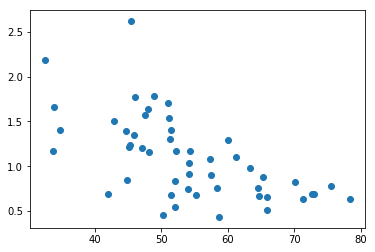

In [748]:
plt.scatter(data_model_reduced['religion ratio'], data_model_reduced['political ratio'])
pearsonr(data_model_reduced['religion ratio'], data_model_reduced['political ratio'])

(-0.55010185025255454, 3.4980362629788597e-05)

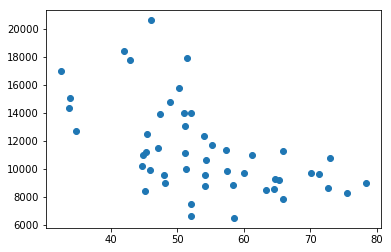

In [749]:
plt.scatter(data_model_reduced['religion ratio'], data_model_reduced['2014 spent per student'])
pearsonr(data_model_reduced['religion ratio'], data_model_reduced['2014 spent per student'])

(-0.49534871439759187, 0.00025477943039243524)

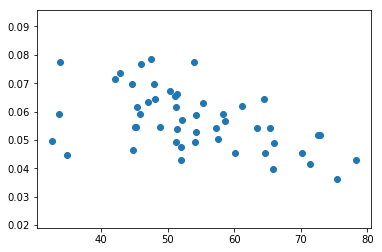

In [750]:
plt.scatter(data_model_reduced['religion ratio'], data_model_reduced['GDP Per Capita'])
pearsonr(data_model_reduced['religion ratio'], data_model_reduced['GDP Per Capita'])

(-0.22531651622191798, 0.11566401628055697)

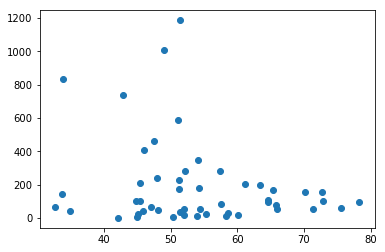

In [751]:
plt.scatter(data_model_reduced['religion ratio'], data_model_reduced['Population Density'])
pearsonr(data_model_reduced['religion ratio'], data_model_reduced['Population Density'])

(-0.54305202350286297, 4.6063214116296615e-05)

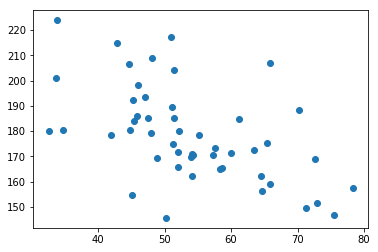

In [752]:
plt.scatter(data_model_reduced['religion ratio'], data_model_reduced['education score'])
pearsonr(data_model_reduced['religion ratio'], data_model_reduced['education score'])